In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import time
from tensorflow import keras
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import os
import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
from keras.models import Model
# from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.core import Dense
# from keras.optimizers import SGD
from keras.layers import Flatten
from keras.layers import Input
import tensorflow as tf
from sklearn import datasets 
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [ ]:
# os.mkdir('results')

# Helper Functions

In [ ]:
def split_X_y(data):
  X = data.drop('H/A',axis = 1)
  X = X.drop('W/A',axis = 1)
  X = X.drop('W/H',axis = 1)
  X = X.drop('Bmi',axis = 1)
  X = X.drop('HAWH',axis = 1)
  y1 = data['W/A']
  y2 = data['H/A']
  y3 = data['W/H']
  y4 = data['Bmi']
  y5 = data['HAWH']
  y1 = y1.to_frame()  # convert y outputs from series to dataframe
  y2 = y2.to_frame()
  y3 = y3.to_frame()
  y4 = y4.to_frame()
  print(X.shape, 'X shape')
  print(y1.shape, 'y1 shape')
  print(y2.shape, 'y2 shape')
  print(y3.shape, 'y3 shape')
  print(y4.shape, 'y4 shape')
  print(y5.shape, 'y5 shape')
  return X, y1, y2, y3, y4, y5

In [ ]:
def norm(data):
  _data = pd.DataFrame(columns=data.columns)
  for c in data.columns:           #Normalization of Data
    min = data[c].min()
    max = data[c].max()
    _data[c] = (data[c] - min)/(max - min)
    # _data = data
  print(_data.head())
  return _data


In [ ]:
def get_accuracy(pred, y_test):
  a = np.argmax(pred, axis = 1)
  accuracy = []
  count = 0
  for i,c in enumerate(y_test):
    if c == a[i]:
      accuracy.append(1)
      count += 1
    else:
      accuracy.append(0)
  print('accuracy', count/len(accuracy))
  return count/len(accuracy)

# Data Load and Preprocessing
###  df = original dataframe
### dfl = label encoded dataframe
### dfd = dummies dataframe


### df 

In [ ]:
df = pd.read_csv('New_Dataset_5-6.csv')

In [ ]:
df = df.drop(['Unnamed: 0.1'], axis = 1)

In [ ]:
df

,state,area,religion,caste,type of family,father's education,father's occupation,mother's education,mother's occupation,total family members,exposure to mass media,Source of drinking water,Toilet Facility,mother's age,mother's bmi,child's age,sex of child,birth weight,initiation of bf(early initiation),wealth index,months of bf,history of illness,immunization,index to birth history,no of living children,sex of household head,dietary score,H/A,W/A,W/H,Bmi,HAWH
0,South_India,Rural,Hindu,OBC,2,Primary education,Rgri,Primary education,Rgri,6,Yes,Improved,Unimproved,<20,underweight,24-36,Male,Not Measured,Late initiation,Poorer,>24,1,Partially immunized,1,2,Male,0,1,1,1,0,1
1,South_India,Rural,Muslim,OBC,2,Secondary education,Rgri,No education,Rgri,7,Yes,Improved,Unimproved,<20,healthy,48-59,Male,Not Measured,Late initiation,Middle,>24,1,Partially immunized,1,2,Male,0,1,0,0,0,0
2,South_India,Rural,Hindu,Others,2,Secondary education,Rgri,Secondary education,unemployed,8,Yes,Improved,Improved,20-29,underweight,6-12,Female,Not Measured,Late initiation,Richer,<24,1,Partially immunized,1,2,Male,0,0,0,0,0,0
3,South_India,Rural,Hindu,Others,2,Secondary education,Rgri,Secondary education,unemployed,8,Yes,Improved,Improved,20-29,underweight,18-24,Male,Not Measured,Late initiation,Richer,<24,0,Fully immunized,2,2,Male,0,1,0,0,0,0
4,South_India,Rural,Christian,SC,2,No education,skilled labour,No education,unemployed,9,Yes,Unimproved,Unimproved,<20,healthy,6-,Female,Not Measured,Late initiation,Middle,<24,0,Partially immunized,1,1,Male,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38054,East_India,Rural,Hindu,Others,2,No education,skilled labour,Secondary education,unemployed,5,Yes,Improved,Improved,<20,underweight,48-59,Female,Not Measured,Late initiation,Poorest,>24,1,Fully immunized,1,1,Male,0,1,1,0,0,0
38055,East_India,Rural,Hindu,Others,1,Primary education,skilled labour,Primary education,unemployed,4,Yes,Improved,Improved,20-29,underweight,48-59,Male,Not Measured,Late initiation,Poorest,<24,0,Fully immunized,1,2,Male,0,1,1,0,0,0
38056,East_India,Rural,Hindu,Others,2,Secondary education,Rgri,Secondary education,unemployed,5,Yes,Improved,Unimproved,<20,healthy,24-36,Female,2.5+,Early initiation,Poorer,>24,0,Fully immunized,1,1,Male,0,1,1,0,0,0
38057,East_India,Rural,Hindu,Others,2,Secondary education,Rgri,Secondary education,unemployed,7,No,Improved,Improved,<20,healthy,36-48,Male,2.5+,Early initiation,Middle,>24,0,Fully immunized,1,3,Male,0,0,0,0,0,0


In [ ]:
print(df.isnull().sum())
print(df.shape)

state                                 0
area                                  0
religion                              0
caste                                 0
type of family                        0
father's education                    0
father's occupation                   0
mother's education                    0
mother's occupation                   0
total family members                  0
exposure to mass media                0
Source of drinking water              0
Toilet Facility                       0
mother's age                          0
mother's bmi                          0
child's age                           0
sex of child                          0
birth weight                          0
initiation of bf(early initiation)    0
wealth index                          0
months of bf                          0
history of illness                    0
immunization                          0
index to birth history                0
no of living children                 0


### dfl

In [ ]:
dfl = pd.DataFrame()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
dfl['state']= label_encoder.fit_transform(df['state'])
dfl['area']= label_encoder.fit_transform(df['area'])
dfl['religion']= label_encoder.fit_transform(df['religion'])
dfl['caste']= label_encoder.fit_transform(df['caste'])
dfl['father\'s education']= label_encoder.fit_transform(df['father\'s education'])
dfl['father\'s occupation']= label_encoder.fit_transform(df['father\'s occupation'])
dfl['mother\'s education']= label_encoder.fit_transform(df['mother\'s education'])
dfl['mother\'s occupation']= label_encoder.fit_transform(df['mother\'s occupation'])
dfl['exposure to mass media']= label_encoder.fit_transform(df['exposure to mass media'])
dfl['Source of drinking water']= label_encoder.fit_transform(df['Source of drinking water'])
dfl['Toilet Facility'] = label_encoder.fit_transform(df['Toilet Facility'])
dfl['mother\'s age']= label_encoder.fit_transform(df['mother\'s age'])
dfl['mother\'s bmi']= label_encoder.fit_transform(df['mother\'s bmi'])
dfl['child\'s age']= label_encoder.fit_transform(df['child\'s age'])
dfl['sex of child']= label_encoder.fit_transform(df['sex of child'])
dfl['birth weight']= label_encoder.fit_transform(df['birth weight'])
dfl['initiation of bf(early initiation)']= label_encoder.fit_transform(df['initiation of bf(early initiation)'])
dfl['wealth index']= label_encoder.fit_transform(df['wealth index'])
dfl['months of bf']= label_encoder.fit_transform(df['months of bf'])
dfl['immunization']= label_encoder.fit_transform(df['immunization'])
dfl['sex of household head']= label_encoder.fit_transform(df['sex of household head'])
dfl['H/A'] = df['H/A']
dfl['W/A'] = df['W/A']
dfl['W/H'] = df['W/H']
dfl['Bmi'] = df['Bmi']
dfl['HAWH'] = df['HAWH']
dfl['history of illness'] = df['history of illness']
dfl['index to birth history'] = df['index to birth history']
dfl['no of living children'] = df['no of living children']
dfl['dietary score'] = df['dietary score']
dfl['total family members'] = df['total family members']
dfl['type of family'] = df['type of family']

In [ ]:
dfl

,state,area,religion,caste,father's education,father's occupation,mother's education,mother's occupation,exposure to mass media,Source of drinking water,Toilet Facility,mother's age,mother's bmi,child's age,sex of child,birth weight,initiation of bf(early initiation),wealth index,months of bf,immunization,sex of household head,H/A,W/A,W/H,Bmi,history of illness,index to birth history,no of living children,dietary score,total family members,type of family,HAWH
0,4,0,1,0,2,0,2,0,1,0,1,3,2,2,1,2,1,1,1,2,1,1,1,1,0,1,1,2,0,6,2,1
1,4,0,2,0,3,0,1,0,1,0,1,3,0,4,1,2,1,0,1,2,1,1,0,0,0,1,1,2,0,7,2,0
2,4,0,1,1,3,0,3,6,1,0,0,0,2,6,0,2,1,3,0,2,1,0,0,0,0,1,1,2,0,8,2,0
3,4,0,1,1,3,0,3,6,1,0,0,0,2,1,1,2,1,3,0,0,1,1,0,0,0,0,2,2,0,8,2,0
4,4,0,0,2,1,5,1,6,1,1,1,3,0,5,0,2,1,0,0,2,1,0,0,0,0,0,1,1,0,9,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38054,1,0,1,1,1,5,3,6,1,0,0,3,2,4,0,2,1,2,1,0,1,1,1,0,0,1,1,1,0,5,2,0
38055,1,0,1,1,2,5,2,6,1,0,0,0,2,4,1,2,1,2,0,0,1,1,1,0,0,0,1,2,0,4,1,0
38056,1,0,1,1,3,0,3,6,1,0,1,3,0,2,0,0,0,1,1,0,1,1,1,0,0,0,1,1,0,5,2,0
38057,1,0,1,1,3,0,3,6,0,0,0,3,0,3,1,0,0,0,1,0,1,0,0,0,0,0,1,3,0,7,2,0


### dfd

In [ ]:
dfd = pd.get_dummies(df)

In [ ]:
dfd

,type of family,total family members,history of illness,index to birth history,no of living children,dietary score,H/A,W/A,W/H,Bmi,HAWH,state_Central_India,state_East_India,state_NorthEast_India,state_North_India,state_South_India,state_West_India,area_Rural,area_Urban,religion_Christian,religion_Hindu,religion_Muslim,religion_Others,religion_Sikh,caste_OBC,caste_Others,caste_SC,caste_ST,father's education_Higher education,father's education_No education,father's education_Primary education,father's education_Secondary education,father's occupation_Rgri,father's occupation_clerical,father's occupation_professional,father's occupation_sales,father's occupation_services,father's occupation_skilled labour,father's occupation_unemployed,mother's education_Higher education,...,mother's occupation_unemployed,exposure to mass media_No,exposure to mass media_Yes,Source of drinking water_Improved,Source of drinking water_Unimproved,Toilet Facility_Improved,Toilet Facility_Unimproved,mother's age_20-29,mother's age_30-39,mother's age_40 or above,mother's age_<20,mother's bmi_healthy,mother's bmi_overweight,mother's bmi_underweight,child's age_12-18,child's age_18-24,child's age_24-36,child's age_36-48,child's age_48-59,child's age_6-,child's age_6-12,sex of child_Female,sex of child_Male,birth weight_2.5+,birth weight_2.5-,birth weight_Not Measured,initiation of bf(early initiation)_Early initiation,initiation of bf(early initiation)_Late initiation,wealth index_Middle,wealth index_Poorer,wealth index_Poorest,wealth index_Richer,wealth index_Richest,months of bf_<24,months of bf_>24,immunization_Fully immunized,immunization_Not immunized,immunization_Partially immunized,sex of household head_Female,sex of household head_Male
0,2,6,1,1,2,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1
1,2,7,1,1,2,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,1
2,2,8,1,1,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
3,2,8,0,2,2,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1
4,2,9,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38054,2,5,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1
38055,1,4,0,1,2,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1
38056,2,5,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1
38057,2,7,0,1,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1


### dfh

In [ ]:
dfh = pd.DataFrame()

In [ ]:
dfh['state']= df['state']
dfh['father\'s education']= df['father\'s education']
dfh['mother\'s education']= df['mother\'s education']
dfh['mother\'s occupation']= df['mother\'s occupation']
dfh['mother\'s age']= df['mother\'s age']
dfh['mother\'s bmi']= df['mother\'s bmi']
dfh['child\'s age']= df['child\'s age']
dfh['birth weight']= df['birth weight']
dfh['wealth index']= df['wealth index']
dfh['months of bf']= df['months of bf']
dfh['immunization']= df['immunization']
dfh['H/A'] = df['H/A']
dfh['W/A'] = df['W/A']
dfh['W/H'] = df['W/H']
dfh['Bmi'] = df['Bmi']
dfh['HAWH'] = df['HAWH']
dfh['index to birth history'] = df['index to birth history']
dfh['no of living children'] = df['no of living children']
dfh['total family members'] = df['total family members']
dfh['type of family'] = df['type of family']


In [ ]:
dfh.to_csv('Dataset_5-6_top15.csv')

In [ ]:
dfhd = pd.get_dummies(dfh)

## dfch

In [ ]:
dfch = pd.DataFrame()

In [ ]:
dfch['caste']= df['caste']
dfch['state']= df['state']
dfch['area']= df['area']
dfch['father\'s education']= df['father\'s education']
dfch['father\'s occupation']= df['father\'s occupation']
dfch['mother\'s education']= df['mother\'s education']
dfch['mother\'s occupation']= df['mother\'s occupation']
dfch['exposure to mass media']= df['exposure to mass media']
dfch['Toilet Facility'] = df['Toilet Facility']
dfch['mother\'s age']= df['mother\'s age']
dfch['mother\'s bmi']= df['mother\'s bmi']
dfch['child\'s age']= df['child\'s age']
dfch['birth weight']= df['birth weight']
dfch['wealth index']= df['wealth index']
dfch['H/A'] = df['H/A']
dfch['W/A'] = df['W/A']
dfch['W/H'] = df['W/H']
dfch['Bmi'] = df['Bmi']
dfch['HAWH'] = df['HAWH']
dfch['no of living children'] = df['no of living children']
dfch['immunization']= df['immunization']
# dfch = dfch.drop(['type of family'], axis = 1)

In [ ]:
dfch.shape

(38059, 21)

In [ ]:
dfch.to_csv('Dataset_5-6_chi16.csv')

In [ ]:
dfchd = pd.get_dummies(dfch)

In [ ]:
dfchd

,H/A,W/A,W/H,Bmi,HAWH,no of living children,caste_OBC,caste_Others,caste_SC,caste_ST,state_Central_India,state_East_India,state_NorthEast_India,state_North_India,state_South_India,state_West_India,area_Rural,area_Urban,father's education_Higher education,father's education_No education,father's education_Primary education,father's education_Secondary education,father's occupation_Rgri,father's occupation_clerical,father's occupation_professional,father's occupation_sales,father's occupation_services,father's occupation_skilled labour,father's occupation_unemployed,mother's education_Higher education,mother's education_No education,mother's education_Primary education,mother's education_Secondary education,mother's occupation_Rgri,mother's occupation_clerical,mother's occupation_professional,mother's occupation_sales,mother's occupation_services,mother's occupation_skilled labour,mother's occupation_unemployed,exposure to mass media_No,exposure to mass media_Yes,Toilet Facility_Improved,Toilet Facility_Unimproved,mother's age_20-29,mother's age_30-39,mother's age_40 or above,mother's age_<20,mother's bmi_healthy,mother's bmi_overweight,mother's bmi_underweight,child's age_12-18,child's age_18-24,child's age_24-36,child's age_36-48,child's age_48-59,child's age_6-,child's age_6-12,birth weight_2.5+,birth weight_2.5-,birth weight_Not Measured,wealth index_Middle,wealth index_Poorer,wealth index_Poorest,wealth index_Richer,wealth index_Richest,immunization_Fully immunized,immunization_Not immunized,immunization_Partially immunized
0,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,1,0,0,0,0,2,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
2,0,0,0,0,0,2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,0,2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38054,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
38055,1,1,0,0,0,2,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
38056,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
38057,0,0,0,0,0,3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0


# Feature Engineering

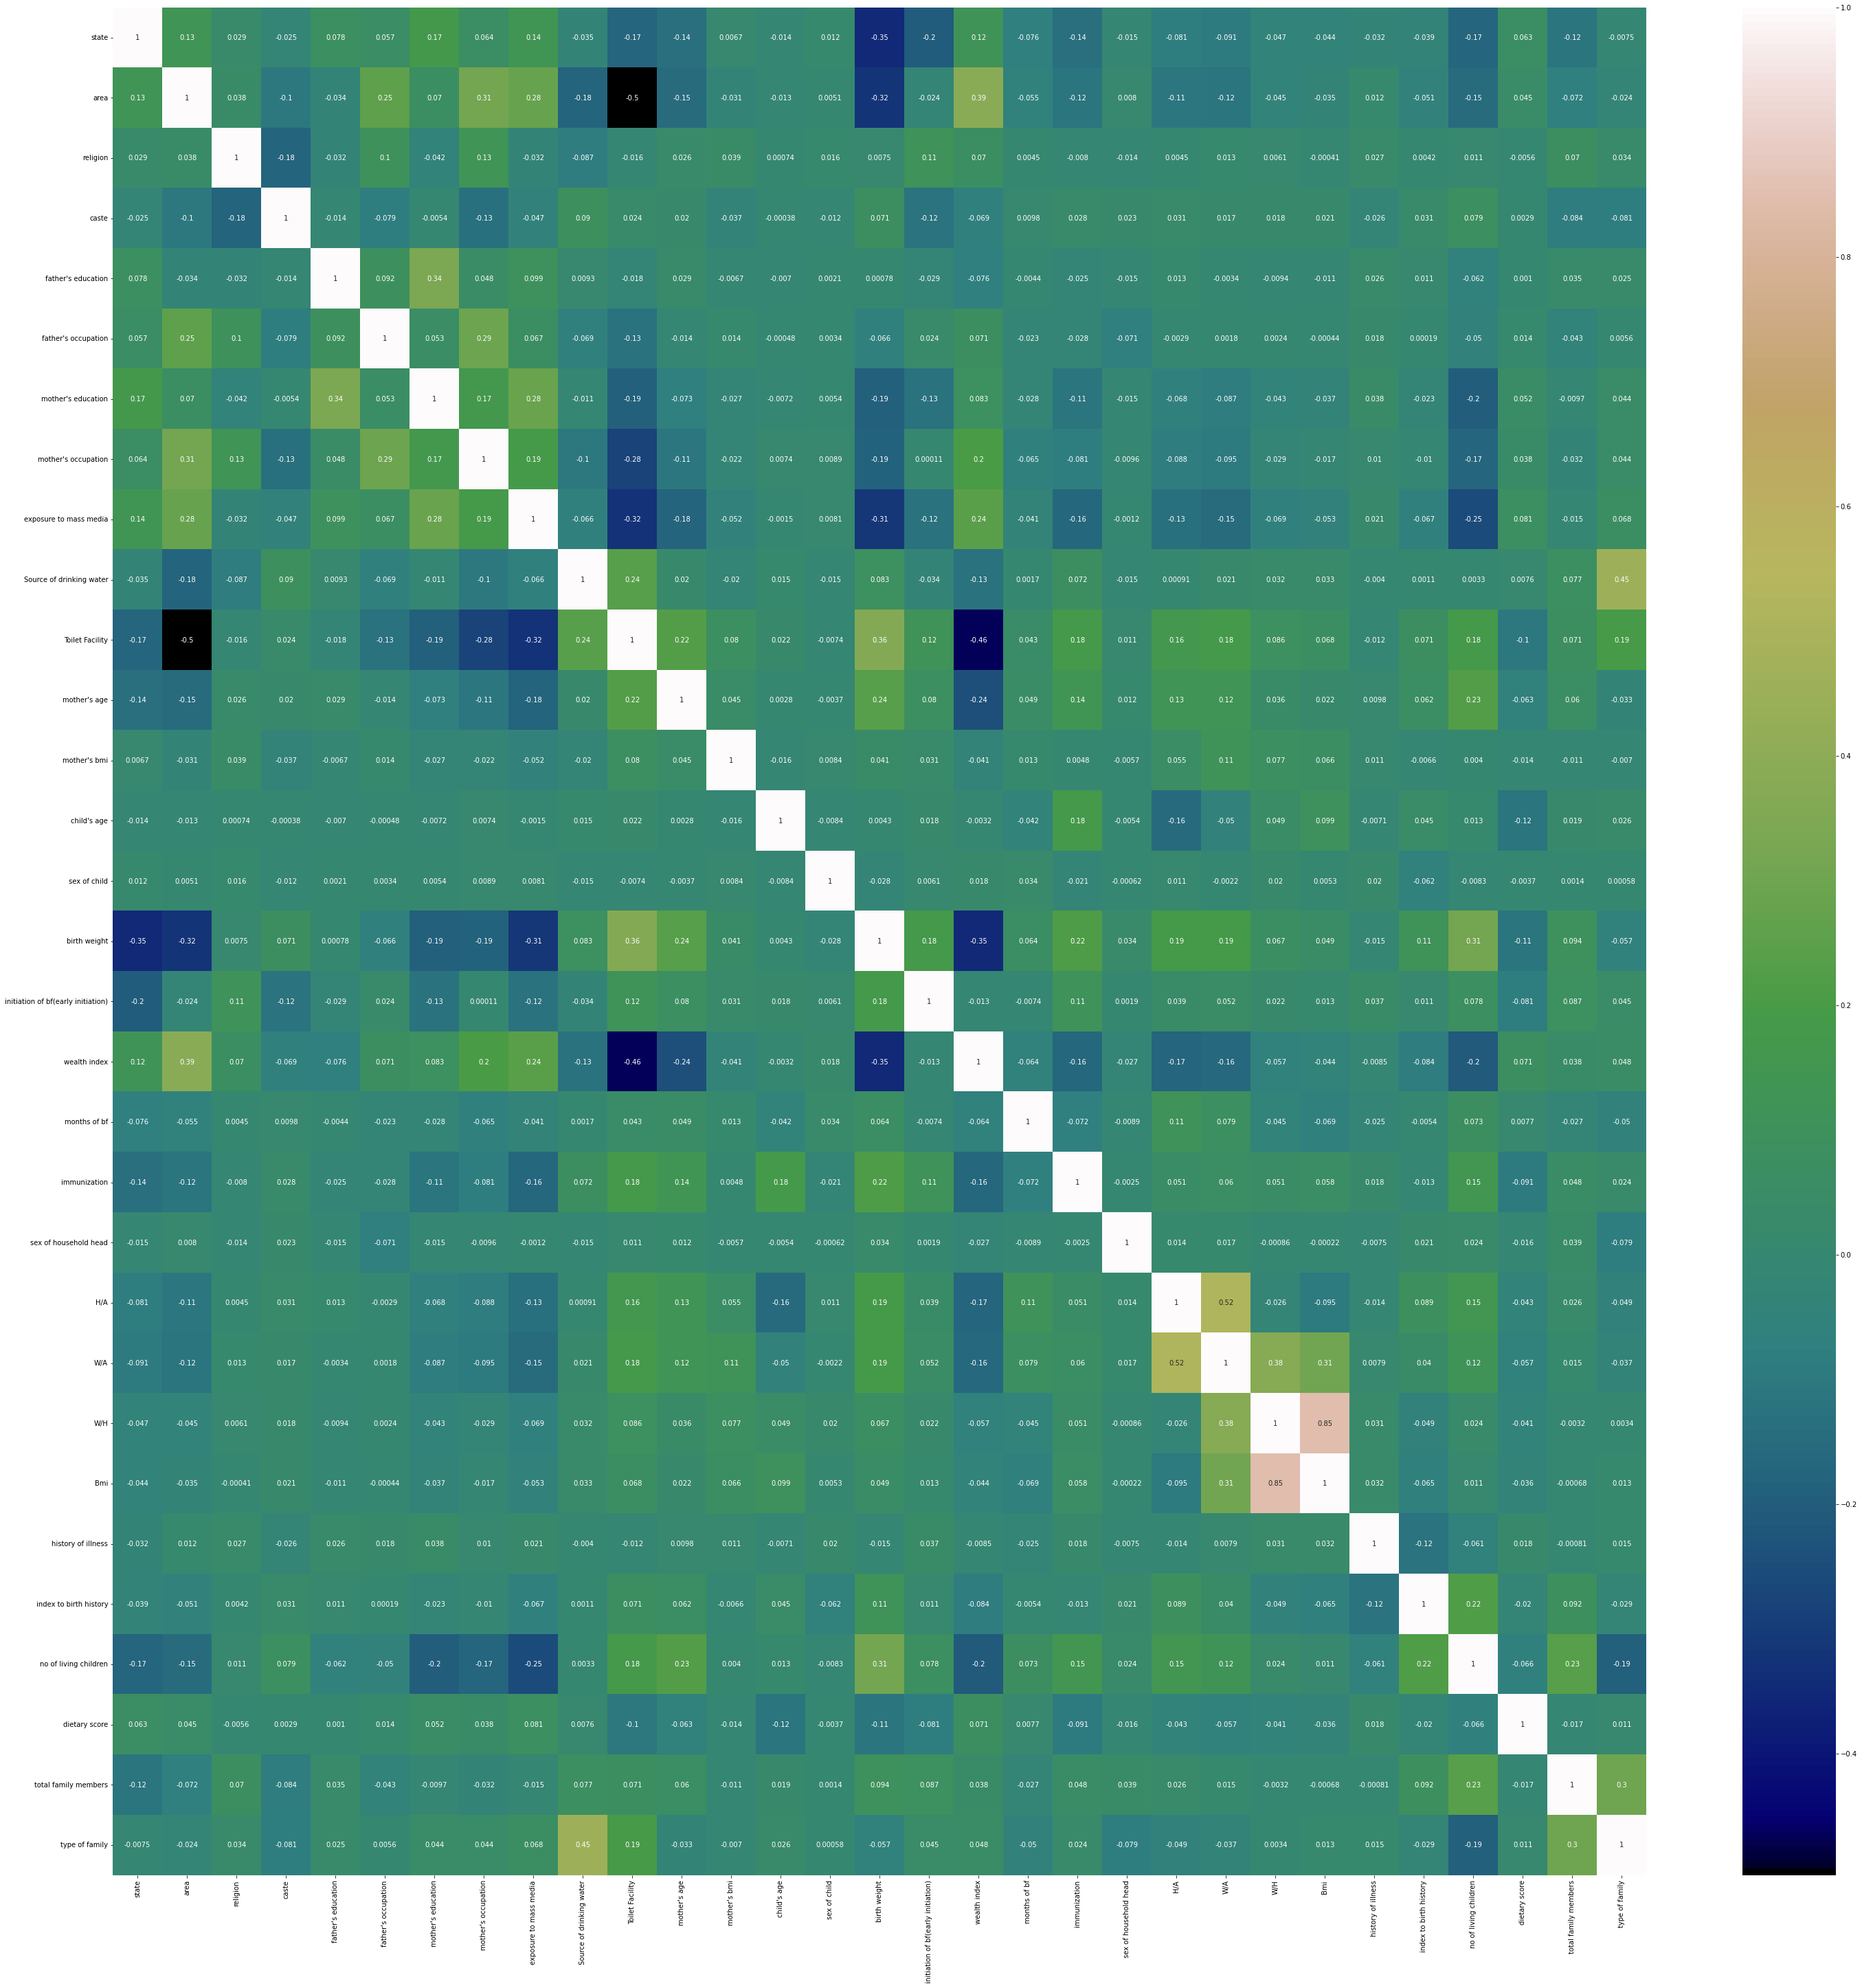

In [ ]:
corrmat = dfl.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(dfl[top_corr_features].corr(),annot=True,cmap="gist_earth")
plt.show()

In [ ]:
X1, a, b, c, d= split_X_y(dfd)

(38059, 84) X shape
(38059, 1) y1 shape
(38059, 1) y2 shape
(38059, 1) y3 shape
(38059, 1) y4 shape


In [ ]:
pca_35 = PCA(n_components=35, random_state= 574)
pca_35.fit(X1)
print('variance explained by 35 components is' , sum(pca_35.explained_variance_ratio_*100))

variance explained by 35 components is 93.54338882385055


In [ ]:
pca_16 = PCA(n_components=16, random_state= 52)
pca_16.fit(X1)
print('variance explained by 16 components is' , sum(pca_16.explained_variance_ratio_*100))

variance explained by 16 components is 95.78784131733914


In [ ]:
np.cumsum(pca_16.explained_variance_ratio_*100)

array([23.99144279, 41.3528594 , 50.36942841, 58.18652437, 65.19133855,
       70.73804653, 75.70260918, 79.46916585, 82.90290367, 85.76521965,
       88.3313542 , 90.17427471, 91.87533056, 93.47667882, 94.77146713,
       95.78784132])

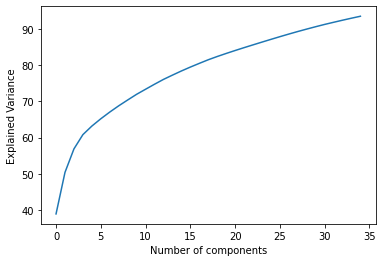

In [ ]:
plt.plot(np.cumsum(pca_35.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.savefig('elbow_plot.png', dpi = 100)

In [ ]:
pca_35.explained_variance_ratio_*100

array([38.9301389 , 11.484899  ,  6.48203202,  3.94036386,  2.35963251,
        2.01902655,  1.85149107,  1.72830358,  1.60794462,  1.57340105,
        1.3959635 ,  1.38564663,  1.33352361,  1.17946656,  1.14672676,
        1.07732886,  1.02367108,  0.99833679,  0.89841504,  0.84264196,
        0.81360092,  0.78961724,  0.77180039,  0.76224408,  0.75499953,
        0.74355727,  0.72415444,  0.70227497,  0.67321573,  0.65479164,
        0.63240454,  0.58676344,  0.57773902,  0.55800929,  0.53926236])

In [ ]:
# pca_n95 = PCA(n_components=0.95, random_state= 359)
# pca_n95.fit(X1)
X_pca_35 = pca_35.transform(X1)

In [ ]:
X_pca_35.shape

(38059, 35)

In [ ]:
X_pca_35

array([[-0.778695  , -0.06827927,  0.87940421, ...,  0.31870225,
         0.12374402,  0.52631931],
       [ 0.233122  , -0.04090707,  0.6402295 , ..., -0.18940659,
         0.50031059,  0.07156397],
       [ 1.10053111, -1.01650252, -0.60127973, ...,  0.38019103,
        -0.10683169,  0.25945302],
       ...,
       [-1.98680216, -1.5060756 ,  0.03878227, ...,  0.27987681,
        -0.04302778, -0.00965985],
       [ 0.2230613 , -0.02105775, -0.29418002, ...,  0.25897948,
         0.08911216, -0.21557467],
       [ 0.89151994, -2.04745485, -1.23413713, ..., -0.07734145,
         0.2729635 , -0.55893961]])

In [ ]:
dfl = dfl.astype(float)
dfd = dfd.astype(float)

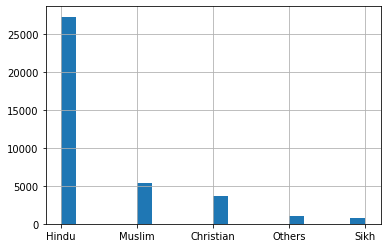

In [ ]:
df['religion'].hist(bins=20);

# New Data For PCA

In [ ]:
df_pca = pd.DataFrame(X_pca_35, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 
                                           'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31',
                                           'PC32', 'PC33', 'PC34', 'PC35'])
df_pca['H/A'] = df['H/A']
df_pca['W/A'] = df['W/A']
df_pca['W/H'] = df['W/H']
df_pca['Bmi'] = df['Bmi']

In [ ]:
df_pca.shape

(38059, 39)

In [ ]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,H/A,W/A,W/H,Bmi
0,-0.778695,-0.068279,0.879404,1.517761,-0.097700,-1.064190,-0.299799,-0.344749,-0.191666,0.228517,-1.439885,0.855172,0.358862,0.391715,-0.348020,-0.161336,-0.349584,-1.040640,-0.556412,0.156622,0.357632,0.126023,0.674950,-0.648655,0.287358,0.706009,0.316651,-0.665213,-0.318096,0.526112,-0.006546,0.094680,0.318702,0.123744,0.526319,1,1,1,0
1,0.233122,-0.040907,0.640230,1.353788,0.001932,-0.652264,-0.485200,-0.557868,-0.016723,1.201139,-0.864645,0.162609,-0.207369,0.390917,-0.161048,0.490542,-0.344191,-0.351675,-1.394559,-0.492268,0.745950,-0.236486,0.067274,-0.053823,-0.614091,-0.078085,-0.136284,0.750688,-0.524179,-0.538762,0.004616,0.538185,-0.189407,0.500311,0.071564,1,0,0,0
2,1.100531,-1.016503,-0.601280,0.285867,-0.241404,0.935501,0.196421,0.385706,-1.055309,0.434471,-0.111850,1.131391,1.169146,-0.410245,0.055394,0.005898,-0.289815,0.213110,-0.175357,1.047890,-0.072747,-0.297943,0.449196,0.068624,-0.091919,0.265503,-0.497461,0.201007,-0.395358,-0.101694,0.190297,-0.239424,0.380191,-0.106832,0.259453,0,0,0,0
3,1.097627,-1.043690,-0.763797,0.047231,-0.029924,-0.460340,-0.434556,0.430291,-1.386952,0.053417,0.596528,0.050486,1.226783,0.465995,0.588616,0.086974,-0.273345,0.272268,-0.110242,1.062441,-0.120196,-0.252760,0.361310,-0.101958,-0.146179,-0.300773,-0.417210,-0.142913,-0.052219,0.019927,0.275794,-0.501295,0.415168,0.004665,0.144883,1,0,0,0
4,2.022569,-1.114615,0.402530,1.772958,-0.259971,1.353767,0.163258,-0.572700,0.704410,0.395957,0.549869,-0.292131,-0.082445,-0.064926,-0.279879,0.179461,0.497687,-1.232591,0.761612,-0.193740,0.225101,0.132288,-0.268359,0.138992,-0.654703,-0.937595,-0.311915,0.370083,-0.186024,-0.062038,0.344212,0.588441,0.344285,0.274768,-0.206749,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38054,-1.981856,-1.189336,0.022155,0.840291,-0.703001,-0.784052,1.300810,-0.468529,0.419035,0.015158,0.304245,-0.032506,1.417759,-0.337305,-0.129780,0.114769,0.008262,-0.320524,-0.061227,0.847418,-0.730493,-0.020430,-0.440183,0.332379,-0.733425,0.893288,-0.048978,0.364374,-0.333604,-0.837731,-0.517742,-0.661744,0.660422,0.109301,0.055927,1,1,0,0
38055,-2.982618,-0.081727,-0.542641,0.377493,-0.662839,-0.572064,-0.405554,0.619361,-0.282657,-0.442234,0.972369,-0.026873,0.974405,0.075808,0.155747,-0.265261,0.050934,-0.739936,-0.030734,0.554986,-0.669185,0.270109,0.935772,-0.284020,-0.414250,0.462689,0.236476,-0.035341,0.674569,-0.574888,-0.614509,-1.011912,0.275879,0.862277,0.208829,1,1,0,0
38056,-1.986802,-1.506076,0.038782,0.662387,1.141460,-0.823811,1.182328,-0.700733,-0.195964,0.142213,-0.443924,-0.388260,0.240575,-1.462775,0.278050,0.518920,-0.511153,0.022388,0.076644,-0.194684,0.350806,-0.489080,-0.307233,-0.518142,0.319805,-0.162219,0.409637,-0.412327,-0.202651,0.123051,0.145289,-0.779142,0.279877,-0.043028,-0.009660,1,1,0,0
38057,0.223061,-0.021058,-0.294180,-0.438207,0.966459,-1.406832,-0.103761,-0.631190,0.139440,0.075997,-0.261905,-0.530016,0.334094,-1.160127,0.293361,0.914512,-0.434482,1.098194,0.083418,-0.077129,0.189647,0.654206,0.563686,0.755553,0.035201,0.060738,-0.802203,-0.233999,0.156444,-0.406548,0.391426,-0.715434,0.258979,0.089112,-0.215575,0,0,0,0


# Train Test Val Split

### Splitting for original algorithm

In [ ]:
Train, test = train_test_split(dfchd, test_size=0.15, random_state = 13)
train, val = train_test_split(Train, test_size=0.15, random_state = 59)

In [ ]:
print(train.shape, ' is the shape of training data for NN')
print(Train.shape, ' is the shape of training data for ML algos')
print(test.shape, ' is the shape of testing data')
print(val.shape, ' is the shape of validation data')

(27497, 69)  is the shape of training data for NN
(32350, 69)  is the shape of training data for ML algos
(5709, 69)  is the shape of testing data
(4853, 69)  is the shape of validation data


In [ ]:
X_Train, y1_Train, y2_Train, y3_Train, y4_Train, y5_Train = split_X_y(Train)

(32350, 64) X shape
(32350, 1) y1 shape
(32350, 1) y2 shape
(32350, 1) y3 shape
(32350, 1) y4 shape
(32350,) y5 shape


In [ ]:
X_test, y1_test, y2_test, y3_test, y4_test, y5_test= split_X_y(test)

(5709, 64) X shape
(5709, 1) y1 shape
(5709, 1) y2 shape
(5709, 1) y3 shape
(5709, 1) y4 shape
(5709,) y5 shape


In [ ]:
X_val, y1_val, y2_val, y3_val, y4_val, y5_val = split_X_y(val)

(4853, 64) X shape
(4853, 1) y1 shape
(4853, 1) y2 shape
(4853, 1) y3 shape
(4853, 1) y4 shape
(4853,) y5 shape


In [ ]:
X_train, y1_train, y2_train, y3_train, y4_train, y5_train = split_X_y(train)

(27497, 64) X shape
(27497, 1) y1 shape
(27497, 1) y2 shape
(27497, 1) y3 shape
(27497, 1) y4 shape
(27497,) y5 shape


In [ ]:
_X_Train = norm(X_Train)
_X_train = norm(X_train)
_X_val = norm(X_val)
_X_test = norm(X_test)

       no of living children  ...  immunization_Partially immunized
29228               0.166667  ...                               1.0
6707                0.166667  ...                               0.0
30283               0.166667  ...                               1.0
10069               0.083333  ...                               1.0
6856                0.083333  ...                               1.0

[5 rows x 64 columns]
       no of living children  ...  immunization_Partially immunized
17541               0.083333  ...                               0.0
4797                0.833333  ...                               1.0
18700               0.250000  ...                               1.0
35483               0.000000  ...                               1.0
23476               0.083333  ...                               0.0

[5 rows x 64 columns]
       no of living children  ...  immunization_Partially immunized
36340                    0.0  ...                               1.0
18

In [ ]:
y1_Train.shape

(32350, 1)

### Splitting for PCA

In [ ]:
Train_pca, test_pca = train_test_split(df_pca, test_size=0.2, random_state = 368)
train_pca, val_pca = train_test_split(Train_pca, test_size=0.15, random_state = 40)

In [ ]:
print(train_pca.shape, ' is the shape of training data for NN')
print(Train_pca.shape, ' is the shape of training data for ML algos')
print(test_pca.shape, ' is the shape of testing data')
print(val_pca.shape, ' is the shape of validation data')

(25879, 39)  is the shape of training data for NN
(30447, 39)  is the shape of training data for ML algos
(7612, 39)  is the shape of testing data
(4568, 39)  is the shape of validation data


In [ ]:
X_Train_pca, y1_Train_pca, y2_Train_pca, y3_Train_pca, y4_Train_pca = split_X_y(Train_pca)

(30447, 35) X shape
(30447, 1) y1 shape
(30447, 1) y2 shape
(30447, 1) y3 shape
(30447, 1) y4 shape


In [ ]:
X_test_pca, y1_test_pca, y2_test_pca, y3_test_pca, y4_test_pca = split_X_y(test_pca)

(7612, 35) X shape
(7612, 1) y1 shape
(7612, 1) y2 shape
(7612, 1) y3 shape
(7612, 1) y4 shape


In [ ]:
X_val_pca, y1_val_pca, y2_val_pca, y3_val_pca, y4_val_pca = split_X_y(val_pca)

(4568, 35) X shape
(4568, 1) y1 shape
(4568, 1) y2 shape
(4568, 1) y3 shape
(4568, 1) y4 shape


In [ ]:
X_train_pca, y1_train_pca, y2_train_pca, y3_train_pca, y4_train_pca = split_X_y(train_pca)

(25879, 35) X shape
(25879, 1) y1 shape
(25879, 1) y2 shape
(25879, 1) y3 shape
(25879, 1) y4 shape


In [ ]:
_X_Train_pca = norm(X_Train_pca)
_X_train_pca = norm(X_train_pca)
_X_val_pca = norm(X_val_pca)
_X_test_pca = norm(X_test_pca)

            PC1       PC2       PC3  ...      PC33      PC34      PC35
14168  0.066613  0.322806  0.400248  ...  0.527307  0.672431  0.279574
9186   0.221180  0.320719  0.443302  ...  0.418626  0.451690  0.288712
10837  0.156864  0.271883  0.442712  ...  0.688311  0.553714  0.387885
32197  0.278022  0.261288  0.327180  ...  0.478211  0.376429  0.545142
7107   0.069156  0.384731  0.448537  ...  0.301388  0.364640  0.531433

[5 rows x 35 columns]
            PC1       PC2       PC3  ...      PC33      PC34      PC35
2249   0.168866  0.576348  0.484243  ...  0.505278  0.511374  0.216398
31992  0.333053  0.655308  0.527562  ...  0.610768  0.342450  0.644575
1158   0.066445  0.342037  0.412724  ...  0.477316  0.448483  0.503224
8984   0.068197  0.414430  0.522515  ...  0.480591  0.439123  0.345071
10657  0.032343  0.311066  0.409330  ...  0.555471  0.415888  0.376142

[5 rows x 35 columns]
            PC1       PC2       PC3  ...      PC33      PC34      PC35
26338  0.159644  0.270564  0.32

# NN PCA

In [ ]:
def base_model_pca(inputs):
    x = tf.keras.layers.Dense(1024, activation= tf.nn.relu)(inputs)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(1024, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(512, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(512, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(256, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(256, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(128, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(128, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(64, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(64, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(32, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(16, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(8, activation= tf.nn.relu)(x)
    return x

In [ ]:
def final_model_pca(inputs):
    
    # get the base model
    x = base_model_pca(inputs)

    # connect the output Dense layer for classification. this will use a sigmoid activation.
    wa = Dense(units='2', activation='sigmoid', name = 'W/A')(x)
    ha = Dense(units='2', activation='sigmoid', name='H/A')(x)
    wh = Dense(units='2', activation='sigmoid', name='W/H')(x)
    bmi = Dense(units='2', activation='sigmoid', name='Bmi')(x)

    # define the model using the input and output layers
    model = Model(inputs=inputs, outputs=[wa, ha, wh, bmi])

    return model

In [ ]:
# inputs = tf.keras.layers.Input(shape=(25,))
inputs= Input(shape=(len(_X_train_pca.columns,)), name='inputs')
print(type(inputs))
adam = tf.keras.optimizers.Adam(learning_rate=0.0008)
model_pca = final_model_pca(inputs)

model_pca.compile(optimizer=adam, 
              loss = {'W/A' : 'binary_crossentropy',
                      'H/A' : 'binary_crossentropy',
                      'W/H' : 'binary_crossentropy',
                      'Bmi' : 'binary_crossentropy'
                     },
              metrics = {'W/A' : 'accuracy',
                         'H/A' : 'accuracy',
                         'W/H' : 'accuracy',
                         'Bmi' : 'accuracy'
                       }
             )

<class 'tensorflow.python.framework.ops.Tensor'>


In [ ]:
_X_train_pca_np = _X_train_pca.to_numpy()
_X_test_pca_np = _X_test_pca.to_numpy()
_X_Train_pca_np = _X_Train_pca.to_numpy()
_X_val_pca_np = _X_val_pca.to_numpy()

In [ ]:
y1_train_pca_oh = to_categorical(y1_train_pca, 2)
y2_train_pca_oh = to_categorical(y2_train_pca, 2)
y3_train_pca_oh = to_categorical(y3_train_pca, 2)
y4_train_pca_oh = to_categorical(y4_train_pca, 2)

In [ ]:
y1_val_pca_oh = to_categorical(y1_val_pca, 2)
y2_val_pca_oh = to_categorical(y2_val_pca, 2)
y3_val_pca_oh = to_categorical(y3_val_pca, 2)
y4_val_pca_oh = to_categorical(y4_val_pca, 2)

In [ ]:
model_pca.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 35)]         0                                            
__________________________________________________________________________________________________
dense_90 (Dense)                (None, 1024)         36864       inputs[0][0]                     
__________________________________________________________________________________________________
dropout_56 (Dropout)            (None, 1024)         0           dense_90[0][0]                   
__________________________________________________________________________________________________
dense_91 (Dense)                (None, 1024)         1049600     dropout_56[0][0]                 
____________________________________________________________________________________________

In [ ]:
# train the model for 2000 epochs
history_pca = model_pca.fit(_X_train_pca_np, [y1_train_pca_oh, y2_train_pca_oh, y3_train_pca_oh, y4_train_pca_oh], 
                    epochs=15, batch_size=64, 
                    validation_data=(_X_val_pca_np, [y1_val_pca_oh, y2_val_pca_oh, y3_val_pca_oh, y4_val_pca_oh]),
                    verbose=1)

Train on 25879 samples, validate on 4568 samples
Epoch 1/15
25879/25879 [==============================] - 7s 283us/sample - loss: 2.1821 - W/A_loss: 0.6213 - H/A_loss: 0.6501 - W/H_loss: 0.4736 - Bmi_loss: 0.4369 - W/A_accuracy: 0.6465 - H/A_accuracy: 0.6200 - W/H_accuracy: 0.8155 - Bmi_accuracy: 0.8407 - val_loss: 2.1695 - val_W/A_loss: 0.6161 - val_H/A_loss: 0.6399 - val_W/H_loss: 0.4722 - val_Bmi_loss: 0.4397 - val_W/A_accuracy: 0.6378 - val_H/A_accuracy: 0.6270 - val_W/H_accuracy: 0.8148 - val_Bmi_accuracy: 0.8378
Epoch 2/15
25879/25879 [==============================] - 7s 282us/sample - loss: 2.1772 - W/A_loss: 0.6201 - H/A_loss: 0.6473 - W/H_loss: 0.4733 - Bmi_loss: 0.4365 - W/A_accuracy: 0.6441 - H/A_accuracy: 0.6247 - W/H_accuracy: 0.8155 - Bmi_accuracy: 0.8407 - val_loss: 2.1755 - val_W/A_loss: 0.6186 - val_H/A_loss: 0.6427 - val_W/H_loss: 0.4740 - val_Bmi_loss: 0.4418 - val_W/A_accuracy: 0.6419 - val_H/A_accuracy: 0.6280 - val_W/H_accuracy: 0.8148 - val_Bmi_accuracy: 0.8378

In [ ]:
pred1, pred2, pred3, pred4 = model_pca.predict(_X_test_pca_np)

In [ ]:
y1_test_pca_np = y1_test_pca.to_numpy()
y2_test_pca_np = y2_test_pca.to_numpy()
y3_test_pca_np = y3_test_pca.to_numpy()
y4_test_pca_np = y4_test_pca.to_numpy()

In [ ]:
WA_accuracy = get_accuracy(pred1, y1_test_pca_np)

accuracy 0.639253809774041


In [ ]:
HA_accuracy = get_accuracy(pred2, y2_test_pca_np)

accuracy 0.6053599579611141


In [ ]:
WA_accuracy = get_accuracy(pred3, y3_test_pca_np)

accuracy 0.8076720966894377


In [ ]:
Bmi_accuracy = get_accuracy(pred4, y4_test_pca_np)

accuracy 0.8343405149763531


In [ ]:
model_pca.save('/content/results/pca_nn1.h5')

# NN

In [ ]:
def base_model(inputs):
    x = tf.keras.layers.Dense(1024, activation= tf.nn.relu)(inputs)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(1024, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(512, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(512, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(256, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(256, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(128, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(128, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(64, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(64, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dense(32, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(16, activation= tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(8, activation= tf.nn.relu)(x)
    return x

In [ ]:
def final_model(inputs):
    
    # get the base model
    x = base_model(inputs)

    # connect the output Dense layer for classification. this will use a sigmoid activation.
    wa = Dense(units='2', activation='sigmoid', name = 'W/A')(x)
    ha = Dense(units='2', activation='sigmoid', name='H/A')(x)
    wh = Dense(units='2', activation='sigmoid', name='W/H')(x)
    bmi = Dense(units='2', activation='sigmoid', name='Bmi')(x)
    hawh = Dense(units='2', activation='sigmoid', name='HAWH')(x)
    # mal = Dense(units = '4', activation = 'softmax', name = 'Mal')(x)

    # define the model using the input and output layers
    model = Model(inputs=inputs, outputs=[wa, ha, wh, bmi, hawh])
    # model = Model(inputs = inputs, outputs = [mal])

    return model

In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [ ]:
# inputs = tf.keras.layers.Input(shape=(25,))
inputs= Input(shape=(len(_X_train.columns,)), name='inputs')
print(type(inputs))
adam = tf.keras.optimizers.Adam(learning_rate=0.0009)
model = final_model(inputs)

model.compile(optimizer=adam, 
              loss = {'W/A' : 'binary_crossentropy',
                      'H/A' : 'binary_crossentropy',
                      'W/H' : 'binary_crossentropy',
                      'Bmi' : 'binary_crossentropy',
                      'HAWH' : 'binary_crossentropy'
                     },
              metrics = {'W/A' : ['accuracy', tf.keras.metrics.AUC()],
                         'H/A' : ['accuracy', tf.keras.metrics.AUC()],
                         'W/H' : ['accuracy', tf.keras.metrics.AUC()],
                         'Bmi' : ['accuracy', tf.keras.metrics.AUC()],
                         'HAWH' : ['accuracy', tf.keras.metrics.AUC()]
                       }
             )
# model.compile(optimizer = adam, loss = {'Mal':'categorical_crossentropy'}, metrics = {'Mal':'accuracy'})

<class 'tensorflow.python.framework.ops.Tensor'>


In [ ]:
_X_train_np = _X_train.to_numpy()
_X_test_np = _X_test.to_numpy()
_X_val_np = _X_val.to_numpy()

In [ ]:
y1_train_oh = to_categorical(y1_train, 2)
y2_train_oh = to_categorical(y2_train, 2)
y3_train_oh = to_categorical(y3_train, 2)
y4_train_oh = to_categorical(y4_train, 2)
# y_train_oh = to_categorical(y_train, 4)
y5_train_oh = to_categorical(y5_train, 2)


In [ ]:
y1_val_oh = to_categorical(y1_val, 2)
y2_val_oh = to_categorical(y2_val, 2)
y3_val_oh = to_categorical(y3_val, 2)
y4_val_oh = to_categorical(y4_val, 2)
y5_val_oh = to_categorical(y5_val, 2)

# y_val_oh = to_categorical(y_val, 4)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 64)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 1024)         66560       ['inputs[0][0]']                 
                                                                                                  
 dropout (Dropout)              (None, 1024)         0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 1024)         1049600     ['dropout[0][0]']                
                                                                                              

In [ ]:
checkpoint_filepath = '/content/results/chi16_nn2.h5'

In [ ]:
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_H/A_accuracy',
#     mode='max',
#     save_best_only=True)                                     

In [ ]:
# train the model for 2000 epochs
history = model.fit(_X_train_np, [y1_train_oh, y2_train_oh, y3_train_oh, y4_train_oh, y5_train_oh], 
                    epochs=20, batch_size=64, 
                    validation_data=(_X_val_np, [y1_val_oh, y2_val_oh, y3_val_oh, y4_val_oh, y5_val_oh]),
                    verbose=1)
# history = model.fit(_X_train_np, y_train_oh, epochs=100, batch_size=64, validation_data=(_X_val_np, y_val_oh), verbose=1)

Train on 27497 samples, validate on 4853 samples
Epoch 1/20
27497/27497 [==============================] - ETA: 0s - loss: 2.7515 - W/A_loss: 0.6728 - H/A_loss: 0.7060 - W/H_loss: 0.5173 - Bmi_loss: 0.4702 - HAWH_loss: 0.3850 - W/A_accuracy: 0.5835 - W/A_auc: 0.6176 - H/A_accuracy: 0.5337 - H/A_auc_1: 0.5502 - W/H_accuracy: 0.7946 - W/H_auc_2: 0.8271 - Bmi_accuracy: 0.8362 - Bmi_auc_3: 0.8538 - HAWH_accuracy: 0.9002 - HAWH_auc_4: 0.9279

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


27497/27497 [==============================] - 12s 453us/sample - loss: 2.7515 - W/A_loss: 0.6728 - H/A_loss: 0.7060 - W/H_loss: 0.5173 - Bmi_loss: 0.4702 - HAWH_loss: 0.3850 - W/A_accuracy: 0.5835 - W/A_auc: 0.6176 - H/A_accuracy: 0.5337 - H/A_auc_1: 0.5502 - W/H_accuracy: 0.7946 - W/H_auc_2: 0.8271 - Bmi_accuracy: 0.8362 - Bmi_auc_3: 0.8538 - HAWH_accuracy: 0.9002 - HAWH_auc_4: 0.9279 - val_loss: 2.5441 - val_W/A_loss: 0.6520 - val_H/A_loss: 0.6804 - val_W/H_loss: 0.4816 - val_Bmi_loss: 0.4457 - val_HAWH_loss: 0.2843 - val_W/A_accuracy: 0.6252 - val_W/A_auc: 0.7038 - val_H/A_accuracy: 0.5601 - val_H/A_auc_1: 0.6141 - val_W/H_accuracy: 0.8113 - val_W/H_auc_2: 0.8545 - val_Bmi_accuracy: 0.8366 - val_Bmi_auc_3: 0.8721 - val_HAWH_accuracy: 0.9155 - val_HAWH_auc_4: 0.9429
Epoch 2/20
27497/27497 [==============================] - 11s 416us/sample - loss: 2.5227 - W/A_loss: 0.6463 - H/A_loss: 0.6767 - W/H_loss: 0.4809 - Bmi_loss: 0.4456 - HAWH_loss: 0.2730 - W/A_accuracy: 0.6213 - W/A_auc: 

In [ ]:
predictions1, predictions2, predictions3, predictions4, predictions5 = model.predict(_X_test_np)
# predictions = model.predict(_X_test_np)

In [ ]:
y1_test_np = y1_test.to_numpy()
y2_test_np = y2_test.to_numpy()
y3_test_np = y3_test.to_numpy()
y4_test_np = y4_test.to_numpy()
y5_test_np = y5_test.to_numpy()
# y_test_np = y_test.to_numpy()

In [ ]:
WA_accuracy = get_accuracy(predictions1, y1_test_np)

accuracy 0.652653704676826


In [ ]:
HA_accuracy = get_accuracy(predictions2, y2_test_np)

accuracy 0.6248029427220179


In [ ]:
WH_accuracy = get_accuracy(predictions3, y3_test_np)

accuracy 0.8134524435102469


In [ ]:
Bmi_accuracy = get_accuracy(predictions4, y4_test_np)

accuracy 0.838150289017341


In [ ]:
HAWH_accuracy = get_accuracy(predictions5, y5_test_np)

accuracy 0.9269574356279559


In [ ]:
# model.load_weights('/content/results/chi16_nn1.h5')

In [ ]:
model.save('/content/results/chi16_nn1.h5')

# Basic ML Algos

In [ ]:
import sklearn
from sklearn.feature_selection import RFE
# define the method
from sklearn.tree import DecisionTreeClassifier
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
# fit the model
rfe.fit(_X_Train, y1_Train)
# transform the data
X, y = rfe.transform(_X_Train, y1_Train)

In [ ]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, _X_Train, y1_Train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

## KNN

In [ ]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors = 50 ).fit(_X_Train, y1_Train) 
  
# accuracy on X_test 
accuracy = knn.score(_X_Test, y1_Test) 
end = time.time()
print(end-start, 'seconds')
print (f'Accuracy of Knn on variable y1 is {accuracy}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


12.371987104415894 seconds
Accuracy of Knn on variable y1 is 0.6513288377627925


In [ ]:
accuracy = []
for i in range(1,50):
  knn = KNeighborsClassifier(n_neighbors = i).fit(_X_Train, y1_Train) 
  knn_accuracy = knn.score(_X_Test, y1_Test)
  accuracy.append(knn_accuracy)
plt.plot(np.arange(1,50), accuracy, '-o')

## SVM

In [ ]:
start = time.time()
svm_model_linear = SVC(kernel = 'rbf', C = 25).fit(_X_Train, y1_Train) 
svm_predictions = svm_model_linear.predict(_X_Test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(_X_Test, y1_Test) 
end = time.time()
print(end - start, 'seconds')
print('accuracy of SVM is', accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


331.08939385414124 seconds
accuracy of SVM is 0.6296443210366257


In [ ]:
# accuracy = []
# for i in range(1,50):
#   svm_model_linear = SVC(kernel = 'rbf', C = i).fit(_X_Train, y1_Train) 
#   svm_predictions = svm_model_linear.predict(_X_Test) 
#   svm_accuracy = svm_model_linear.score(_X_Test, y1_Test) 
#   accuracy.append(svm_accuracy)
# plt.plot(np.arange(1,50), accuracy, '-o')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

### Decision Tree

In [ ]:
start = time.time()
dtree_model = DecisionTreeClassifier(max_depth = 5).fit(_X_Train, y1_Train) 
dtree_predictions = dtree_model.predict(_X_Test)
end = time.time()
print(end - start, 'seconds') 
print(dtree_model.score(_X_Test, y1_Test))
  
# creating a confusion matrix 
cm = confusion_matrix(y1_Test, dtree_predictions)

0.07317614555358887 seconds
0.6480232711886817


In [ ]:
def relation_graph(max_depth):
  dtree_model = DecisionTreeClassifier(max_depth = max_depth).fit(_X_Train, y1_Train) 
  dtree_predictions = dtree_model.predict(_X_Test)
  dtree_accuracy = []
  count = 0
  for i,c in enumerate(y1_Test):
      if c == dtree_predictions[i]:
        dtree_accuracy.append(1)
        count += 1
      else:
        dtree_accuracy.append(0)
  print('decision_tree_accuracy', count/len(dtree_accuracy))
  return (count/len(dtree_accuracy))

In [ ]:
_X_Test.shape

(7563, 25)

decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
decision_tree_accuracy 0.0
d

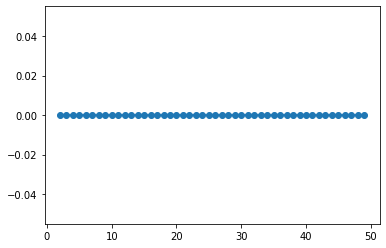

In [ ]:
accuracy= []
for i in range(2,50):
  a = relation_graph(i)
  accuracy.append(a)
plt.plot(np.arange(2,50,1), accuracy, '-o')

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(_X_Train,y1_Train)

#
y_pred=logreg.predict(_X_Test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import sklearn.metrics as metrics
# from sklearn.metrics import accuracy_score 
print("Accuracy:",metrics.accuracy_score(y1_Test, y_pred))

Accuracy: 0.6530477323813302
